In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Reading

In [0]:
data = pd.read_csv('/content/drive/My Drive/6_MOVIELENS/rating.csv')
movies = pd.read_csv('/content/drive/My Drive/6_MOVIELENS/movie.csv')

In [5]:
print(data.columns)
print(data.shape)
print('No of rating : ',data.shape[0] )

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')
(20000263, 4)
No of rating :  20000263


# 2. EDA based in userId

In [6]:
print('Check for null value : ',data.userId.isnull().any())
print('No of unique user : ',len(np.unique(data.userId)))
print(data.userId.min())
print(data.userId.max())

Check for null value :  False
No of unique user :  138493
1
138493


In [7]:
no_rating_per_user=data.groupby('userId').count()['rating'].copy()
no_rating_per_user.sort_values(inplace=True)
print(sum(no_rating_per_user == no_rating_per_user.max()),'user gives maximum no of rating is ',no_rating_per_user.max())
print(sum(no_rating_per_user == no_rating_per_user.min()),'user gives minimum no of rating is ',no_rating_per_user.min())

1 user gives maximum no of rating is  9254
4485 user gives minimum no of rating is  20


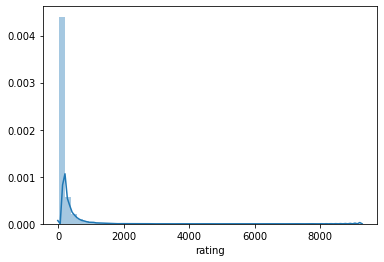

In [8]:
sns.distplot(no_rating_per_user)
# according to this there are lots of user who gave no of rating betwwen [0-250] 

In [9]:
for i in range (91,101):
    print('Percentile --- ',i,' --- ',np.percentile(no_rating_per_user,i))
# 10 percent people gives more than 360 rating 
# 90 percent people gives less then 360 rating

Percentile ---  91  ---  360.0
Percentile ---  92  ---  390.0
Percentile ---  93  ---  424.0
Percentile ---  94  ---  467.0
Percentile ---  95  ---  520.0
Percentile ---  96  ---  587.0
Percentile ---  97  ---  684.0
Percentile ---  98  ---  834.0
Percentile ---  99  ---  1113.0799999999872
Percentile ---  100  ---  9254.0


In [0]:
avg_rating_per_user = data.groupby('userId').sum()['rating'].copy() / data.groupby('userId').count()['rating'].copy()
avg_rating_per_user.sort_values(inplace=True)

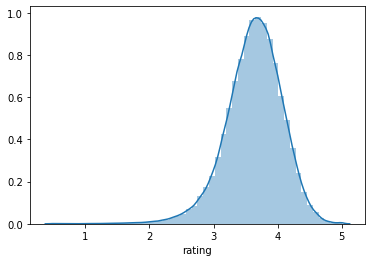

In [11]:
sns.distplot(avg_rating_per_user)
# most of peoples avg ratings lies between 3.5 to 3.8

# 3. EDA based in movieId

In [12]:
print('Check for null value : ',data.movieId.isnull().any())
print('No of unique movie : ',len(np.unique(data.movieId)))
print(data.movieId.min())
print(data.movieId.max())

Check for null value :  False
No of unique movie :  26744
1
131262


In [13]:
no_rating_per_movie=data.groupby('movieId').count()['rating'].copy()
no_rating_per_movie.sort_values(inplace=True)
print(sum(no_rating_per_movie == no_rating_per_movie.max()),'movies with maximum no of rating is ',no_rating_per_movie.max())
print(sum(no_rating_per_movie == no_rating_per_movie.min()),'movies with minimum no of rating is ',no_rating_per_movie.min())


1 movies with maximum no of rating is  67310
3972 movies with minimum no of rating is  1


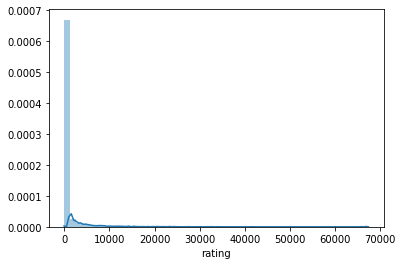

In [14]:
sns.distplot(no_rating_per_movie)
# according to this there are lots of people who gave no of rating betwwen [0-250] 

In [15]:
for i in range (91,101):
    print('Percentile --- ',i,' --- ',np.percentile(no_rating_per_movie,i))
# 10% movies has no of360 rating 
# 90 percent people gives less then 360 rating

Percentile ---  91  ---  1543.0
Percentile ---  92  ---  1848.0
Percentile ---  93  ---  2285.980000000003
Percentile ---  94  ---  2847.0
Percentile ---  95  ---  3612.94999999999
Percentile ---  96  ---  4700.559999999998
Percentile ---  97  ---  6219.969999999994
Percentile ---  98  ---  8835.779999999984
Percentile ---  99  ---  14388.689999999995
Percentile ---  100  ---  67310.0


In [0]:
avg_rating_per_movie = data.groupby('movieId').sum()['rating'].copy() / data.groupby('movieId').count()['rating'].copy()
avg_rating_per_movie.sort_values(inplace=True)

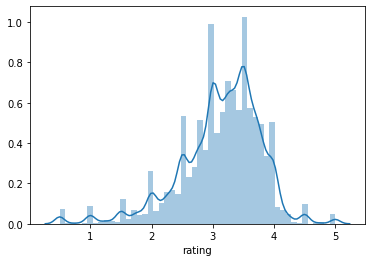

In [17]:
sns.distplot(avg_rating_per_movie)
# most of movies avg ratings lies between 2.5 to 4

# 3. EDA based in rating

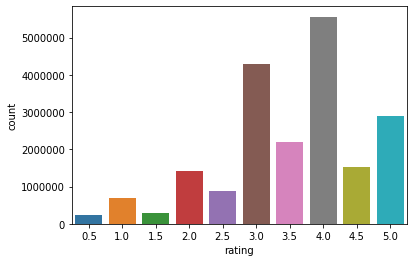

In [18]:
sns.countplot(data.rating)

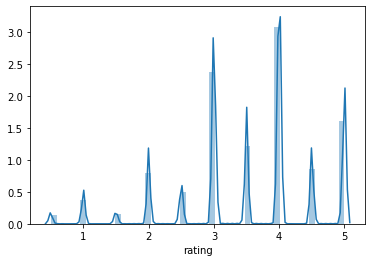

In [19]:
sns.distplot(data.rating.sort_values())

# 4. Create Sparse matrix

1: Here user id start from 1 to 138493 so u_u_sim is of(138493,138493) which required around 54GB

2: Here movie id start from 1 to 131262 so m_m_sim is of(131262,131262) which required around 49GB

3: So tatal RAM required is 103Gb so we build system on small datasets

4: So we consider userId < 20000 for u_u_sim

5: So we consider movieId < 40000 for m_m_sim

In [0]:
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity

## User-User similarity

In [0]:
# small_data_user = data[data.userId < 20000]
# print('Shape',small_data_user.shape)
# print('Unique no of user',len(np.unique(small_data_user.userId)))
# print('Unique no of movie',len(np.unique(small_data_user.movieId)))
# print('sparse matrix dim will be: (',small_data_user.userId.max(),',',small_data_user.movieId.max(),')')


In [0]:
# u_sparse_matrix = csr_matrix((small_data_user.rating,(small_data_user.userId,small_data_user.movieId)))
# u_u_simi = cosine_similarity(u_sparse_matrix)
# print('Sparse matrix dim : ',u_sparse_matrix.shape)
# print('User User similarity matrix dim :',u_u_simi.shape)


## Movie-Movie similarity

In [21]:
small_data_movie = data[data.movieId < 40000]
print('Shape',small_data_movie.shape)
print('Unique no of user',len(np.unique(small_data_movie.userId)))
print('Unique no of movie',len(np.unique(small_data_movie.movieId)))
print('sparse matrix dim will be: (',small_data_movie.userId.max(),',',small_data_movie.movieId.max(),')')


Shape (18163195, 4)
Unique no of user 138488
Unique no of movie 10546
sparse matrix dim will be: ( 138493 , 39941 )


In [0]:
m_sparse_matrix = csr_matrix((small_data_movie.rating,(small_data_movie.movieId,small_data_movie.userId)))
m_m_simi = cosine_similarity(m_sparse_matrix)

In [23]:
print(m_sparse_matrix.shape)
print(m_m_simi.shape)


(39942, 138494)
(39942, 39942)


In [57]:
movie_title = 'Persuasion (1995)'
movie_id = movies[movies.title == movie_title]['movieId']
print(movie_id.iloc[0])

28


In [63]:
try:
    movie_title = 'Emma (1996)'
    movie_id = movies[movies.title == movie_title]['movieId'].iloc[0]
    print(movies[movies.movieId == movie_id])
    print('\nMaximum similarity',m_m_simi[movie_id].max(),'with movie_id',np.argmax(m_m_simi[movie_id]))
    print('\nIndex with assending similarity',np.argsort(m_m_simi[movie_id]))
    print('\nTop 5 movieId with maximum similarity: ',np.argsort(m_m_simi[movie_id])[-5:])
    a = np.argsort(m_m_simi[movie_id])[-5:]
    a = reversed(a)
    for i in a :
        print(movies[movies.movieId == i])
except:
    print('Movie not in datasets')

     movieId        title                genres
823      838  Emma (1996)  Comedy|Drama|Romance

Maximum similarity 1.0000000000000266 with movie_id 838

Index with assending similarity [    0 25279 25280 ...    28    17   838]

Top 5 movieId with maximum similarity:  [1183  497   28   17  838]
     movieId        title                genres
823      838  Emma (1996)  Comedy|Drama|Romance
    movieId                         title         genres
16       17  Sense and Sensibility (1995)  Drama|Romance
    movieId              title         genres
27       28  Persuasion (1995)  Drama|Romance
     movieId                          title          genres
493      497  Much Ado About Nothing (1993)  Comedy|Romance
      movieId                        title             genres
1159     1183  English Patient, The (1996)  Drama|Romance|War


In [39]:
a=np.argsort(m_m_simi[movie_id])
print(a)
print(a[-5:])

[    0 25394 25395 ...   838    17    28]
[515 497 838  17  28]
